# Controle : House Prices: Advanced Regression Techniques

## Description de la compétition

Demandez à un acheteur de maison de décrire la maison de ses rêves et ils ne commenceront probablement pas avec la hauteur du plafond du sous-sol ou la proximité d'un chemin de fer est-ouest. Cependant, les données de cette compétition de terrain de jeu prouvent que le nombre de chambres à coucher ou de palissades blanches est beaucoup plus influencé par les négociations de prix.
Avec 79 variables explicatives décrivant (presque) tous les aspects des logements résidentiels à Ames, dans l'Iowa, cette compettion nous met au défi de prévoir le prix final de chaque logement.

## Chargement des données

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### Transformation des datasets en dataframme à l'aide de pandas

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

### Indexation des dataframmes par la colonnes "Id"

In [3]:
df_train = df_train.set_index("Id")
df_test = df_test.set_index("Id")

### verification du contenu des dataframes (train et test)

In [5]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.shape

(1460, 80)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [10]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Etat de la variable à prédire avec la fonction describe()

In [11]:
df_train.SalePrice.describe().round()

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

<h3>Inspection des prédicteurs de type  numeriques <h3>

In [13]:

num_predictor_train = df_train.select_dtypes(include = [np.number])

num_predictor_test = df_test.select_dtypes(include = [np.number])
num_predictor_train.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### Determination des valeurs manquantes dans les prédicteurs de type numérique

In [14]:
Valeurs_nulles_train= pd.DataFrame(num_predictor_train.isnull().sum())
Valeurs_nulle_test= pd.DataFrame(num_predictor_test.isnull().sum())


In [15]:
print(Valeurs_nulles_train, '\n')
print(Valeurs_nulle_test)

                 0
MSSubClass       0
LotFrontage    259
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0 

                 0
MSSubClass       0
LotFrontage    227
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF  

### Remplacement des valeurs manquantes en utilisant imputetation de la bibliothèque sktlearn

<h3> Imputation avec les données du training de de type numeric </h3>

In [16]:
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings("ignore")
imputer_train = Imputer(missing_values='NaN', strategy='mean',axis=0)
D=imputer_train.fit_transform( df_train.select_dtypes(include = [np.number]))
numeric_predictor_train=pd.DataFrame(D,columns=df_train.select_dtypes(include = [np.number]).columns)
numeric_predictor_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null float64
TotRmsAbvGrd     1460 non-null floa

<h3> Imputation avec les données du test de de type numeric </h3>

In [17]:
imputer_test = Imputer(missing_values='NaN', strategy='mean',axis=0)
D=imputer_test.fit_transform( df_test.select_dtypes(include = [np.number]))
numeric_predictor_test=pd.DataFrame(D,columns=df_test.select_dtypes(include = [np.number]).columns)
numeric_predictor_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
MSSubClass       1459 non-null float64
LotFrontage      1459 non-null float64
LotArea          1459 non-null float64
OverallQual      1459 non-null float64
OverallCond      1459 non-null float64
YearBuilt        1459 non-null float64
YearRemodAdd     1459 non-null float64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null float64
2ndFlrSF         1459 non-null float64
LowQualFinSF     1459 non-null float64
GrLivArea        1459 non-null float64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
FullBath         1459 non-null float64
HalfBath         1459 non-null float64
BedroomAbvGr     1459 non-null float64
KitchenAbvGr     1459 non-null float64
TotRmsAbvGrd     1459 non-null floa

In [18]:
print(numeric_predictor_train.isnull().sum(),'\n')
print(numeric_predictor_test.isnull().sum())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64 

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF    

<h3> Coorrelation entre la cible et les prédicteurs de type numérique </h3>

<h3>Inspection des prédicteurs de type  catégorical <h3>

In [21]:
categorical_predictor_train = df_train.select_dtypes(exclude= [np.number])
categorical_predictor_test = df_test.select_dtypes(exclude= [np.number])
categorical_predictor_train.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [22]:
print(categorical_predictor_train[categorical_predictor_train.columns].nunique(), '\n')
print(categorical_predictor_test[categorical_predictor_train.columns].nunique())

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64 

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         1
LotCo

In [23]:
categorical_predictor_train.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

<h3>Suppression des prédicteurs qui contiennent plus de 45 % des valeurs manquantes </h3>

In [24]:

categorical_predictor_train.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [25]:
categorical_predictor_test.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [26]:
print(categorical_predictor_train.isnull().sum(),'/n')
print(categorical_predictor_test.isnull().sum())

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64 /n
MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood      

In [27]:
categorical_predictor_train.shape

(1460, 39)

<h3> Imputation avec les données du test de de type catégorical </h3>

<h4>imputation du training<h4/>

In [28]:
from sklearn.impute import SimpleImputer
imp_categorical_train = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Z=imp_categorical_train.fit_transform(categorical_predictor_train)
cate_predictor_train=pd.DataFrame(Z,columns=categorical_predictor_train.columns)
cate_predictor_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     14

<h4>imputation du test <h4/>

In [29]:
imp_categorical_test = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
T=imp_categorical_test.fit_transform(categorical_predictor_test)
cate_predictor_test=pd.DataFrame(T,columns=categorical_predictor_test.columns)
cate_predictor_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
MSZoning         1459 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     14

<h3>Transformation des varibales discrètes en varibles continues<h3/>

In [32]:
cate_predictor_train = pd.get_dummies(cate_predictor_train)
cate_predictor_test = pd.get_dummies(cate_predictor_test)

In [34]:
cate_predictor_train = cate_predictor_train.drop(['Condition2_RRAe','Exterior2nd_Other','Condition2_RRAn','Condition2_RRNn','HouseStyle_2.5Fin','RoofMatl_ClyTile','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','Exterior1st_ImStucc','Heating_Floor','Heating_OthW','Electrical_Mix','GarageQual_Ex', 'Exterior1st_Stone','Utilities_NoSeWa'], axis=1)


In [90]:
cate_predictor_train.isnull().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Street_Grvl              0
Street_Pave              0
LotShape_IR1             0
LotShape_IR2             0
LotShape_IR3             0
LotShape_Reg             0
LandContour_Bnk          0
LandContour_HLS          0
LandContour_Low          0
LandContour_Lvl          0
Utilities_AllPub         0
LotConfig_Corner         0
LotConfig_CulDSac        0
LotConfig_FR2            0
LotConfig_FR3            0
LotConfig_Inside         0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
                        ..
GarageFinish_Fin         0
GarageFinish_RFn         0
GarageFinish_Unf         0
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
G

#### Après avoir transformer les données de type categorical en type numerique de notre dataset Place maintenant à ressembler les deux partie de notre dataset et revoir l'ensemble des predicteurs qui ont une forte correlation avec la cible 

In [59]:
dataframe_train=pd.concat([numeric_predictor_train, cate_predictor_train], axis=1, sort=False)
dataframe_test=pd.concat([numeric_predictor_test, cate_predictor_test], axis=1, sort=False)


In [60]:
dataframe_train.shape

(1460, 260)

In [61]:
dataframe_test.shape



(1459, 259)

Observation de la distribution de la valeur à predire

Nous remarquons que la asymétrique avec une queue de distribution beaucoup plus allongée sur le côté droit.

In [ ]:

sns.distplot(dataframe_train['SalePrice'],
            color='r')
sns.set(rc={'figure.figsize':(20,15)})
plt.show()

<h3>Nous remarquons que La distribution  est asymétrique avec une queue de distribution beaucoup plus allongée sur le côté droit.
Pour remedier à ce problème , Nous allons transformer les  données de la cible vers la normalité en utilisant une transformation de type Box-Cox. </h3>

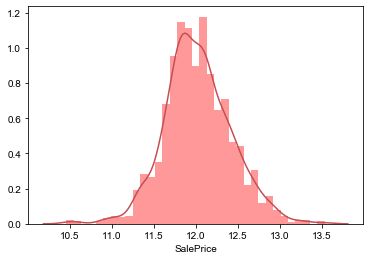

In [63]:
from scipy import stats
target = np.log(dataframe_train.SalePrice)
#target=stats.boxcox(dataframe_train['SalePrice'])

sns.distplot(target,
            color='r')
sns.set(rc={'figure.figsize':(20,15)})
plt.show()

<h3> A present visionons les valeurs aberrantes des predicteurs qui ont une forte correlattion avec la cible </h3>

In [64]:
#Analyse du prédicteur - ground living area 
dataframe_train_1=dataframe_train[dataframe_train['SalePrice']<450000]

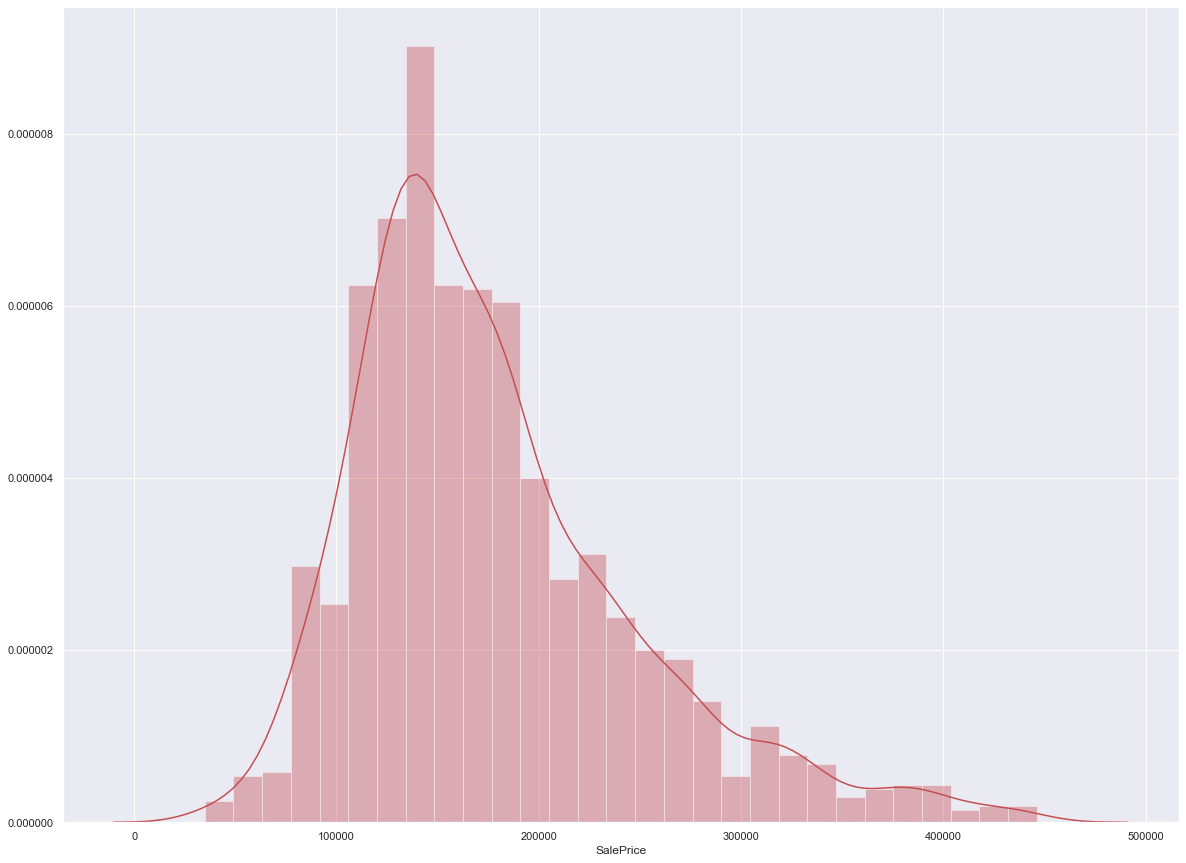

In [65]:

sns.distplot(dataframe_train_1['SalePrice'],
            color='r')
sns.set(rc={'figure.figsize':(20,15)})
plt.show()

In [66]:
corr_SalePrice_1 = dataframe_train.corr()["SalePrice"].sort_values(ascending=False)
top_corr_features = dataframe_train.index[abs(corr_SalePrice_1 ['SalePrice'])>0.5]
plt.figure(figsize=(16,7))
top_corr_features.drop("SalePrice").plot.bar()
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [69]:
#median = dataframe_train.loc[dataframe_train["GrLivArea"] >4500, 'GrLivArea'].median()
#a= np.where(dataframe_train["GrLivArea"] >4500, median,dataframe_train["GrLivArea"])
#a

In [70]:
dataframe_train_1.shape

(1446, 260)

In [71]:
dataframe_train_1=dataframe_train[dataframe_train['SalePrice']<450000]

In [72]:
dataframe_train_1.RoofStyle

AttributeError: 'DataFrame' object has no attribute 'RoofStyle'

<h1>Apprentissage du modèle </h1>

<p style="font-size:1.3em;color:#2467C0">Nous allons séparer le dataframe du trainning en train et test en faisant le hold out pour savoir la performance de notra algorithme <p>

In [75]:
from sklearn.model_selection import train_test_split
X= dataframe_train_1.drop(['SalePrice'],axis=1)
#= dataframe_train[glody1]
y =np.log(dataframe_train_1['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)

## KNN Regression

In [76]:
dataframe_train.shape


(1460, 260)

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [78]:
from math import sqrt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred = knn.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print('RMSE is {}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print(RMSE)
mean_absolute_error(y_test, y_pred)
#metrics.roc_auc_score( y_test, y_pred)


RMSE is 0.21333204054664823
0.21333204054664823


0.15460435721170507

## Linear Regression

In [79]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,LogisticRegression)
lr = LinearRegression()
lr.fit(X_train, y_train)
np.abs(lr.coef_)
y_pred = lr.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.1355291972287122


## SVM

In [80]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.36524576680331716


## Regression Logistique

In [81]:
from sklearn import utils
lab_enc = LabelEncoder()
X_train_encoded = lab_enc.fit_transform(y_train)
print(X_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(X_train_encoded))


[ 99 348 245 246 456  30 360 258 364  88 501 372 475 417 271 115  34 154
  58  92 425  91  17 457  85 100 247 340  25 167 107 168 154 135 411 186
 276 358  70  88 224 230  87 472  73  61 158 335 179 168  29  13 360 162
 368  56 361 370  42 437 391 162 163 410 370  27 133  71 166 264 335 252
 146 184 327 104 154   1 463 106  24 359 315 154 252  91 158 400 120 240
  84 367 494 397 106 476 385 107 421 148 268 177  46 113 288 137 437 165
 186 258  82  85 208 188 248 118 417 242 130 397 318 186 142 377 439 198
 159 350 315 216 284 347 445 483 225  85 285  62 473 444 273 350 304   4
  76 397 361 393 310  85 384  52 284 259 195 126 258 186 133 271  59  39
 458 120 118 415 150  95 247 280 351 385  75 275 452 380 194 208 115 449
 320 162 196  52 421 304 216 134 124 346 157 200  71 101 284 207 399 367
 105 231 238 290 385 385 256 447 211 106  16 478  90 450 484  45 283 271
  86  79 468 310 490   4 438 284 336  87 293 162 421  36 186  42  69 367
 224 160 111 314 293 218 197 427  88 154 145 127 31

In [82]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

ValueError: Unknown label type: 'continuous'

## Arbre de decision

In [83]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.2231932279900585


## Ridge Regression (Regression d'aretes)

In [71]:
from sklearn.linear_model import RidgeCV
r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]
rid = RidgeCV(alphas=r_alphas, cv = 5)
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.1251014766569439


# Lasso Regression

In [72]:
from sklearn.linear_model import LassoCV, Lasso
alphas = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]
lsso = LassoCV(max_iter=1e7, alphas = alphas, random_state = 40)
lsso.fit(X_train, y_train)
lsso.alpha_
y_pred = lsso.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.12460598777056613


# Methode d'aggrégation (ensembliste)

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.13838270388931428


## Voting

In [85]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('knn', knn), ('rf', rf)])
er.fit(X_train, y_train)
y_pred=er.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)


0.1562452408989497


## AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=30), learning_rate=0.5, random_state=42)
ada_reg.fit(X_train, y_train)
y_pred_ada = ada_reg.predict(X_test)
RMSE_ada = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_ada))
RMSE_ada

0.12832566918846686

## XGBoost

In [87]:
import xgboost as xgb
xg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

[23:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1145108212748509


## Gradient boosting 

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=5, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gra = gbrt.predict(X_test)
RMSE_gra = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_gra))
RMSE_gra

0.19694126762332662

## Light Gradient boosting Machine

In [89]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor( random_state=42)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE

0.11989102359600456

In [ ]:
leaderboard  = pd.DataFrame({'RMSE':[0.009,0.08,0.36,249.8,0.007,0.079, 0.08,0.006,0.006,0.005,0.012,0.02,0.012]}, index = ['KNN','Linear Regression', 'SVM','Rgression Logistique','Decision Tree','Lasso','Ridge',
                                                           'Random Forest','Voting','AdaBoost', 'XgBoost','Gradient Boosting','Light Gradient Boosting'])

In [ ]:
leaderboard

# Reduction de la dimentionalité 

# Features Selection

## La correlation avc la cible

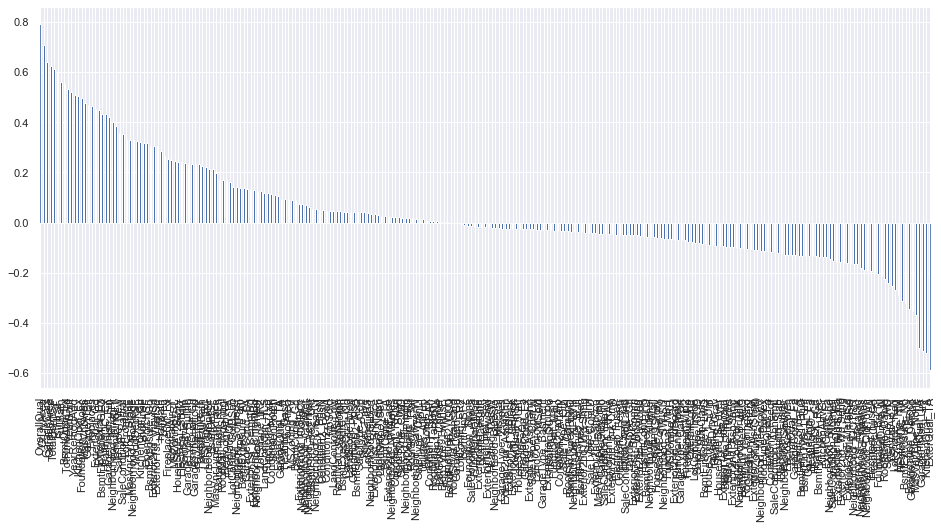

In [91]:
corr_with_SalePrice = dataframe_train.corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(16,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.show()

In [186]:
relevant_features = corr_with_SalePrice[corr_with_SalePrice>-0.1]
A=pd.DataFrame(relevant_features)
B=A.select_dtypes(exclude= [np.number])
B[121:171
 ]

""
RoofStyle_Mansard
GarageCond_Gd
LotConfig_FR2
BsmtFinSF2
Foundation_Stone
SaleCondition_Alloca
Functional_Mod
Exterior2nd_Stone
BsmtHalfBath
Functional_Sev


In [347]:
features=[  'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','BsmtQual_Ex','TotRmsAbvGrd','YearBuilt',
'YearRemodAdd','KitchenQual_Ex','Foundation_PConc','MasVnrArea','GarageYrBlt','Fireplaces','ExterQual_Gd','ExterQual_Ex','BsmtFinType1_GLQ',
'HeatingQC_Ex','GarageFinish_Fin','Neighborhood_NridgHt','BsmtFinSF1','SaleType_New','SaleCondition_Partial','LotFrontage',
'MasVnrType_Stone','Neighborhood_NoRidge','WoodDeckSF','KitchenQual_Gd','2ndFlrSF','OpenPorchSF','BsmtExposure_Gd','Exterior2nd_VinylSd',
'Exterior1st_VinylSd','HalfBath','LotArea','FireplaceQu_Ex','CentralAir_Y','MSZoning_RL','HouseStyle_2Story','Electrical_SBrkr',
'RoofStyle_Hip','GarageType_BuiltIn','BsmtQual_Gd','GarageType_Attchd','PavedDrive_Y','BsmtFullBath','LotShape_IR1',
'Neighborhood_StoneBr','BsmtUnfSF','MasVnrType_BrkFace','GarageFinish_RFn','RoofMatl_WdShngl','BedroomAbvGr','FireplaceQu_TA',
'LotConfig_CulDSac','Neighborhood_Somerst','BldgType_1Fam',
'BsmtExposure_Av',
'GarageCond_TA',
'Exterior1st_CemntBd',
'Exterior2nd_CmentBd',
'Neighborhood_Timber',
'LotShape_IR2',
'LandContour_HLS',
'Functional_Typ',
'Condition1_Norm',
'ScreenPorch',
'ExterCond_TA',
'GarageQual_TA',
'Heating_GasA',
'PoolArea',
'MSZoning_FV',
'BsmtCond_Gd',
'Exterior2nd_ImStucc',
'Neighborhood_CollgCr',
'Neighborhood_Crawfor',
'Neighborhood_Veenker',
'BsmtFinType2_Unf',
'Neighborhood_ClearCr',
'Condition1_PosN',
'Condition2_PosN',
'Condition2_PosA',
'MoSold',
'LandContour_Low',
'RoofMatl_WdShake',
'3SsnPorch',
'BsmtExposure_Mn',
'GarageQual_Gd',
'LandSlope_Mod',
'Condition1_PosA',
'BsmtFinType2_ALQ',
'SaleType_Con',
'Street_Pave',
'LotShape_IR3',
'Neighborhood_Gilbert',
'Exterior1st_BrkFace',
'Condition2_Norm',
'LandSlope_Sev',
'BsmtCond_TA',
'Exterior2nd_BrkFace',
'Neighborhood_NWAmes',
'Condition1_RRNn',
'RoofStyle_Shed',
'SaleType_CWD',
'Neighborhood_Blmngtn',
'LotConfig_FR3',
'RoofStyle_Flat',
'Neighborhood_SawyerW',
'SaleType_ConLI',
'Utilities_AllPub',
'ExterCond_Ex',
'Condition1_RRAn',
'RoofMatl_Tar&Grv',
'Condition1_RRNe',
'LotConfig_Corner',
'BldgType_TwnhsE',
'Foundation_Wood',
'BsmtFinType2_GLQ',
'RoofStyle_Mansard',
'GarageCond_Gd',
'LotConfig_FR2',
'BsmtFinSF2',
'Foundation_Stone',
'SaleCondition_Alloca',
'Functional_Mod',
'Exterior2nd_Stone',
'BsmtHalfBath',
'Functional_Sev',
'Exterior1st_Plywood',
'Heating_GasW',
'Neighborhood_Blueste',
'MiscVal',
'GarageType_2Types',
'Exterior2nd_AsphShn',
'Exterior1st_CBlock',
'Exterior2nd_CBlock',
'LowQualFinSF',
'HouseStyle_2.5Unf',
'FireplaceQu_Fa',
'GarageCond_Ex',
'Exterior1st_AsphShn',
'SaleType_ConLw',
'LandContour_Lvl',
'YrSold',
'GarageType_Basment',
'Exterior1st_Stucco',
'HeatingQC_Po',
'Functional_Maj1',
'ExterCond_Po',
'Condition2_Artery',
'SaleType_Oth',
'RoofStyle_Gambrel',
'BsmtFinType2_LwQ',
'Neighborhood_NPkVill',
'HouseStyle_SLvl',
'BsmtFinType2_Rec',
'Exterior2nd_Wd Shng',
'Street_Grvl',
'SaleType_ConLD',
'Exterior2nd_Stucco',
'MasVnrType_BrkCmn',
'GarageQual_Po',
'SaleCondition_Family',
'Condition1_RRAe',
'Exterior2nd_Brk Cmn',
'Electrical_FuseP',
'Condition2_Feedr',
'ExterCond_Gd']

 ## Apprentissage du modèle 
 
 

In [348]:
from sklearn.model_selection import train_test_split
X= dataframe_train[features]
y =target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)

## KNN Regression

In [349]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
from math import sqrt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred = knn.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.23559377762424924


## Linear Regression

In [351]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,LogisticRegression)
lr = LinearRegression()
lr.fit(X_train, y_train)
np.abs(lr.coef_)
y_pred = lr.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.16779566145434888


## SVM

In [352]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.41294454991189133


## Regression Logistique

In [353]:
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
X_train_encoded = lab_enc.fit_transform(y_train)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial').fit(X_train, X_train_encoded)
y_pred = clf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

230.38049292787755


## Arbre de decision

In [354]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.21752853965474248


## Regression Ridge

In [355]:
from sklearn.linear_model import RidgeCV
#r_alphas = [.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]
rid = RidgeCV(alphas=[15], cv = 5)
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.14752194265832466


   ## Regression lasso

In [356]:
from sklearn.linear_model import LassoCV, Lasso
#alphas = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lsso = LassoCV(max_iter=1e7, alphas = [0.0008], random_state = 40)
lsso.fit(X_train, y_train)
lsso.alpha_
y_pred = lsso.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.1460608258217055


##  Random Forest

In [357]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 49)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.1567765530519448


##  Voting

In [358]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('lgbm', lgbm), ('xg', xg)])
er.fit(X_train, y_train)
y_pred=er.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

[02:35:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1476262241383287


## Ada Boost

In [359]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=30), learning_rate=0.5, random_state=40)
ada_reg.fit(X_train, y_train)
y_pred_ada = ada_reg.predict(X_test)
RMSE_ada = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_ada))
RMSE_ada

0.15116030975222788

In [360]:
import xgboost as xgb
xg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.04)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

[02:35:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15396077732522315


In [361]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=5, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gra = gbrt.predict(X_test)
RMSE_gra = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_gra))
RMSE_gra

0.21356052386123825

In [362]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE

0.14865946058033935

In [ ]:
leaderboard

# Seuil de variance

In [464]:
from sklearn.feature_selection import VarianceThreshold
vseuil=VarianceThreshold(0.1)

vseuil.fit_transform(dataframe_train)


vseuil
dataframe_train[dataframe_train.columns[vseuil.get_support(indices=True)]].columns



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',

In [466]:
features_variance=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Av', 'BsmtExposure_No', 'BsmtFinType1_ALQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'BsmtFinType2_Unf',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_WD',
       'SaleCondition_Normal']

## Apprentissage du modèle

In [467]:
from sklearn.model_selection import train_test_split
X= dataframe_train[features_variance]
y =target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .30)

## Knn

In [468]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
from math import sqrt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred = knn.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.22765370211393285


## Linear Regression

In [469]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,LogisticRegression)
lr = LinearRegression()
lr.fit(X_train, y_train)
np.abs(lr.coef_)
y_pred = lr.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.14819413276501908


## Svm

In [470]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.4121598812139032


## Regression Logistique

In [471]:
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
X_train_encoded = lab_enc.fit_transform(y_train)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial').fit(X_train, X_train_encoded)
y_pred = clf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

227.4208057556095


## Arbre de decision

In [472]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.21014213949003518


## Ridge Regression (Regression d'aretes)

In [473]:
from sklearn.linear_model import RidgeCV
#r_alphas = [.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]
rid = RidgeCV(alphas=[15], cv = 5)
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.14410304676480426


## Lasso Regression

In [483]:
from sklearn.linear_model import LassoCV, Lasso
#alphas = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lsso = LassoCV(max_iter=1e7, alphas = [0.0008], random_state = 40)
lsso.fit(X_train, y_train)
lsso.alpha_
y_pred = lsso.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.1437291452728292


## Random Forest

In [476]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 49)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

0.15513568523617782


## Voting

In [484]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('lgbm', lgbm), ('xg', xg)])
er.fit(X_train, y_train)
y_pred=er.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

[12:52:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.12919776249730675


## Ada Boost

In [479]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=30), learning_rate=0.5, random_state=40)
ada_reg.fit(X_train, y_train)
y_pred_ada = ada_reg.predict(X_test)
RMSE_ada = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_ada))
RMSE_ada

0.14244124672750888

## xgboost

In [480]:
import xgboost as xgb
xg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

[03:33:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1315576975882787


## GradientBoosting

In [481]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=5, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gra = gbrt.predict(X_test)
RMSE_gra = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_gra))
RMSE_gra

0.2110078905205598

## LightGradientBoosting

In [482]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
RMSE

0.1364268730969422

In [488]:
leaderboard_variance  = pd.DataFrame({'RMSE':[0.227,0.148,0.412,227.42,0.210, 0.144,0.143,0.155,0.129,0.142,0.131,0.211,0.136]}, index = ['KNN','Linear Regression', 'SVM','Rgression Logistique','Decision Tree','Lasso','Ridge',
                                                           'Random Forest','Voting','AdaBoost', 'XgBoost','Gradient Boosting','Light Gradient Boosting'])

In [489]:
leaderboard_variance 

,RMSE
KNN,0.227
Linear Regression,0.148
SVM,0.412
Rgression Logistique,227.420
Decision Tree,0.210
Lasso,0.144
Ridge,0.143
Random Forest,0.155
Voting,0.129
AdaBoost,0.142


In [85]:
y_train1 =dataframe_train_1['SalePrice']
x_train1 =dataframe_train_1.drop(['SalePrice'],axis=1)
x_test1=dataframe_test

In [86]:

lgbm1 = lgb.LGBMRegressor( random_state=42)

lgbm1.fit(x_train1, y_train1)

y_pred_l = lgbm1.predict(x_test1)


In [87]:

xgm = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgm.fit(x_train1, y_train1)
y_pred = xgm.predict(x_test1)

[18:04:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
y_pred

array([122629.87 , 165058.56 , 184251.7  , ..., 157979.95 , 120042.086,
       227546.94 ], dtype=float32)

In [89]:
submission = pd.DataFrame({
        "Id": df_test.index,
        "SalePrice": y_pred_l
    })

In [ ]:
submission.to_csv('./sample_submission25.csv',index=False)  

In [1]:
def main():
    argent=int(input("ecrire votre montant "))
    cout=int(input("ecrire votre cout "))
    resultat=argent-cout
    if resultat < 0:
        print("pas d'argent")
    else: 
        print("argent sufisant",resultat)
main()        

ecrire votre montant 


ValueError: invalid literal for int() with base 10: ''